In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [131]:
data = pd.read_csv('new_income_evaluation.csv')
data

,Unnamed: 0,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,32556,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,32557,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,32558,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,32559,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [132]:
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,4,12,0,0,0,0,0,38,0,39,77516,2174,0,40
1,6,12,1,1,1,0,0,38,0,50,83311,0,0,13
2,2,8,4,2,0,0,0,38,0,38,215646,0,0,40
3,2,6,1,2,1,1,0,38,0,53,234721,0,0,40
4,2,12,1,3,2,1,1,4,0,28,338409,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,2,10,1,10,2,0,1,38,0,27,257302,0,0,38
32534,2,8,1,9,1,0,0,38,1,40,154374,0,0,40
32535,2,8,6,0,4,0,1,38,0,58,151910,0,0,40
32536,2,8,0,0,3,0,0,38,0,22,201490,0,0,20


In [133]:
X = data.drop('income', axis=1)
y = data['income']

In [134]:
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, stratify=y)

In [135]:
def shapeInfo(X1, X2, y1, y2):
    data_type = [X1, X2, y1, y2]
    shape = []
    frame = pd.DataFrame(columns=['shape'], index=['X1', 'X2', 'y1', 'y2'])

    for i in range(0, len(data_type)):
        shape.append(data_type[i].shape)

    frame['shape'] = shape
    
    return frame

In [136]:
shapeInfo(X_temp, X_test, y_temp, y_test)

,shape
X1,"(27657, 13)"
X2,"(4881, 13)"
y1,"(27657,)"
y2,"(4881,)"


In [137]:
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.15, stratify=y_temp)

In [138]:
shapeInfo(X_train, X_val, y_train, y_val)

,shape
X1,"(23508, 13)"
X2,"(4149, 13)"
y1,"(23508,)"
y2,"(4149,)"


In [139]:
scaler_m = MinMaxScaler()
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
X_val_norm = X_val.copy()

In [140]:
X_train_norm = pd.DataFrame(scaler_m.fit_transform(X_train_norm), index=X_train_norm.index, columns=X_train_norm.columns)
X_test_norm = pd.DataFrame(scaler_m.fit_transform(X_test_norm), index=X_test_norm.index, columns=X_test_norm.columns)
X_val_norm = pd.DataFrame(scaler_m.transform(X_val_norm), index=X_val_norm.index, columns=X_val_norm.columns)

In [141]:
scaler_s = StandardScaler()
X_train_s = X_train.copy()
X_test_s = X_test.copy()
X_val_s = X_val.copy()

In [142]:
X_train_s = pd.DataFrame(scaler_s.fit_transform(X_train_s), index=X_train_s.index, columns=X_train_s.columns)
X_test_s = pd.DataFrame(scaler_s.fit_transform(X_test_s), index=X_test_s.index, columns=X_test_s.columns)
X_val_s = pd.DataFrame(scaler_s.fit_transform(X_val_s), index=X_val_s.index, columns=X_val_s.columns)

In [143]:
def NaiveClass(X_train, X_val, X_test, y_train, y_val, y_test):

    naive = GaussianNB()

    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc = []

    index = ['X_test', 'X_val']

    data_type = [X_test, X_val]
    target_type = [y_test, y_val]
    columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    result = pd.DataFrame(columns=columns, index=index)

    for i in range(0, len(data_type)):
        predict = naive.fit(X_train, y_train).predict(data_type[i])

        accuracy.append(accuracy_score(target_type[i], predict))
        precision.append(precision_score(target_type[i], predict))
        recall.append(recall_score(target_type[i], predict, average='weighted'))
        f1.append(f1_score(target_type[i], predict, average='weighted'))
        roc.append(roc_auc_score(target_type[i], predict, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1 Score'] = f1
    result['ROC AUC'] = roc

    return result.sort_values('F1 Score', ascending=False)

**Prediction on X validation and test Minmax dataset**

In [144]:
NaiveClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.811719,0.694992,0.811719,0.791335,0.667602
X_val,0.801880,0.666045,0.801880,0.778753,0.650078


**Prediction on X validation and test Standard scaler dataset**

In [145]:
NaiveClass(X_train_s, X_val_s, X_test_s, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.818685,0.732057,0.818685,0.797334,0.672481
X_val,0.802362,0.667910,0.802362,0.779291,0.650737


**Menggunakan StandardScaler dataset karena score X_test dan X_val lebih tinggi daripada versi MinMax**

In [146]:
scaler = StandardScaler()
x_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
x_scaled

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,capital-gain,capital-loss,hours-per-week
0,0.778911,1.122195,-0.836671,-1.396730,-1.073307,-0.353453,-0.703003,0.287299,0.030410,-1.063569,0.148298,-0.21674,-0.035663
1,2.075223,1.122195,-0.227941,-1.078342,-0.377624,-0.353453,-0.703003,0.287299,0.837000,-1.008668,-0.145973,-0.21674,-2.222516
2,-0.517401,-0.423779,1.598247,-0.759953,-1.073307,-0.353453,-0.703003,0.287299,-0.042917,0.245056,-0.145973,-0.21674,-0.035663
3,-0.517401,-1.196767,-0.227941,-0.759953,-0.377624,1.240318,-0.703003,0.287299,1.056980,0.425770,-0.145973,-0.21674,-0.035663
4,-0.517401,1.122195,-0.227941,-0.441564,0.318058,1.240318,1.422468,-4.849623,-0.776181,1.408096,-0.145973,-0.21674,-0.035663
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,-0.517401,0.349208,-0.227941,1.787157,0.318058,-0.353453,1.422468,0.287299,-0.849508,0.639700,-0.145973,-0.21674,-0.197652
32534,-0.517401,-0.423779,-0.227941,1.468769,-0.377624,-0.353453,-0.703003,0.287299,0.103736,-0.335427,-0.145973,-0.21674,-0.035663
32535,-0.517401,-0.423779,2.815706,-1.396730,1.709423,-0.353453,1.422468,0.287299,1.423612,-0.358770,-0.145973,-0.21674,-0.035663
32536,-0.517401,-0.423779,-0.836671,-1.396730,1.013741,-0.353453,-0.703003,0.287299,-1.216140,0.110944,-0.145973,-0.21674,-1.655554


**Hyperparameter Tuning**

In [147]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5,
                                    n_repeats=3,
                                    random_state=999)

In [148]:
y_train.shape

(23508,)

In [149]:
X_train_s.shape

(23508, 13)

In [150]:
model = GaussianNB().fit(X_train_s,y_train)

In [151]:
from sklearn.preprocessing import PowerTransformer

params = {'var_smoothing': np.logspace(0, -9, num=100)}
gs_nb = GridSearchCV(estimator=model, param_grid=params, cv=cv_method, verbose=1, scoring='accuracy')
data_transformed = PowerTransformer().fit_transform(X_test)
gs_nb.fit(data_transformed, y_test)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=999),
             estimator=GaussianNB(),
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             scoring='accuracy', verbose=1)

In [152]:
gs_nb.best_params_

{'var_smoothing': 0.3511191734215131}

In [153]:
gs_nb.best_estimator_

GaussianNB(var_smoothing=0.3511191734215131)

In [154]:
gs_nb.best_score_

0.8163637990726601

In [155]:
results_nb = pd.DataFrame(gs_nb.cv_results_['params'])
results_nb['test_score'] = gs_nb.cv_results_['mean_test_score']

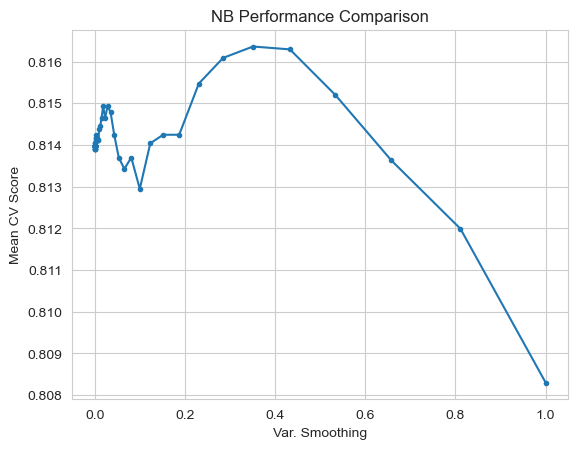

In [156]:
plt.plot(results_nb['var_smoothing'], results_nb['test_score'], marker = '.')
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [157]:
pred = gs_nb.predict(data_transformed)
print(f'accuracy score on X test standar scaler dataset: {accuracy_score(y_test, pred)}')

accuracy score on X test standar scaler dataset: 0.8190944478590453


**Membuat ulang model dengan menggunakan var smoothing**

In [158]:
def NaiveClass(X_train, X_val, X_test, y_train, y_val, y_test):

    naive = GaussianNB(var_smoothing= 0.043287)

    accuracy = []
    precision = []
    recall = []
    f1 = []
    roc = []

    index = ['X_test', 'X_val']

    data_type = [X_test, X_val]
    target_type = [y_test, y_val]
    columns = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC']

    result = pd.DataFrame(columns=columns, index=index)

    for i in range(0, len(data_type)):
        predict = naive.fit(X_train, y_train).predict(data_type[i])

        accuracy.append(accuracy_score(target_type[i], predict))
        precision.append(precision_score(target_type[i], predict))
        recall.append(recall_score(target_type[i], predict, average='weighted'))
        f1.append(f1_score(target_type[i], predict, average='weighted'))
        roc.append(roc_auc_score(target_type[i], predict, average='weighted'))

    result['Accuracy'] = accuracy
    result['Precision'] = precision
    result['Recall'] = recall
    result['F1 Score'] = f1
    result['ROC AUC'] = roc

    return result.sort_values('F1 Score', ascending=False)

In [159]:
NaiveClass(X_train_norm, X_val_norm, X_test_norm, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.814177,0.621719,0.814177,0.812167,0.735682
X_val,0.805736,0.607778,0.805736,0.802142,0.717450


In [160]:
NaiveClass(X_train_s, X_val_s, X_test_s, y_train, y_val, y_test)

,Accuracy,Precision,Recall,F1 Score,ROC AUC
X_test,0.826470,0.752688,0.826470,0.807278,0.686606
X_val,0.816582,0.716878,0.816582,0.796137,0.672730


**Berdasarkan hasil akurasi yang didapatkan menggunakan minmax dan standar scaler, didapatkan perbedaan antara skor X_test dan X_val, dimana score validasi kurang dari test, namun perbedaan tidaklah jauh. Dari perbedaan tersebut, data tersebut overfitting, namun overfitting disini tidaklah besar, sehingga tidak perlu khawatir untuk melakukan perubahan data lagi.**